In [12]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import itertools
warnings.filterwarnings("ignore")
# Lectura sin formato
data = pd.read_csv('AirPassengers.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [13]:
# Formato
import datetime
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print(data.head())
# Serie temporal
ts = data['#Passengers'] 
print(ts.head(10))
# Seleccionar un elemento
print(ts['1949-01-01'])
print(ts[datetime.datetime(1949,1,1)])
# Seleccionar un rango de valores correlativos
print(ts['1949-01-01':'1949-05-01'])
print(ts[:'1949-05-01'])
# Rango de fechas
print(ts['1949'])

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64
112
112
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64


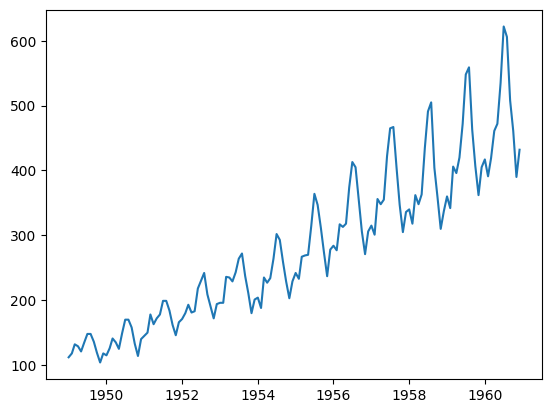

In [14]:
plt.plot(ts)
plt.show()

## Parámetros mediante ARIMA

In [15]:
y_train = ts[:'1957-12']
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# Ajuste de hiperparámetros
mejor = np.inf
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < mejor:
                mejor = results.aic
                mejores_parametros = [param, param_seasonal]
        except:
            continue


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1497.7366324421453
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1395.1992019886297
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:951.210659060875
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:911.4984239200699
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1121.916216192579
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1082.869658604269
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:862.198004394014
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:841.1799531962885
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1357.7177148131345
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1255.7607754613884
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:866.6327480004857
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:845.8588807159838
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1023.3531479047062
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1059.5735321166117
ARIMA(0, 0, 1)x(1, 1, 0, 12)1

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.091     -2.648      0.008      -0.420      -0.063
sigma2        92.7499     13.439      6.902      0.000      66.410     119.090


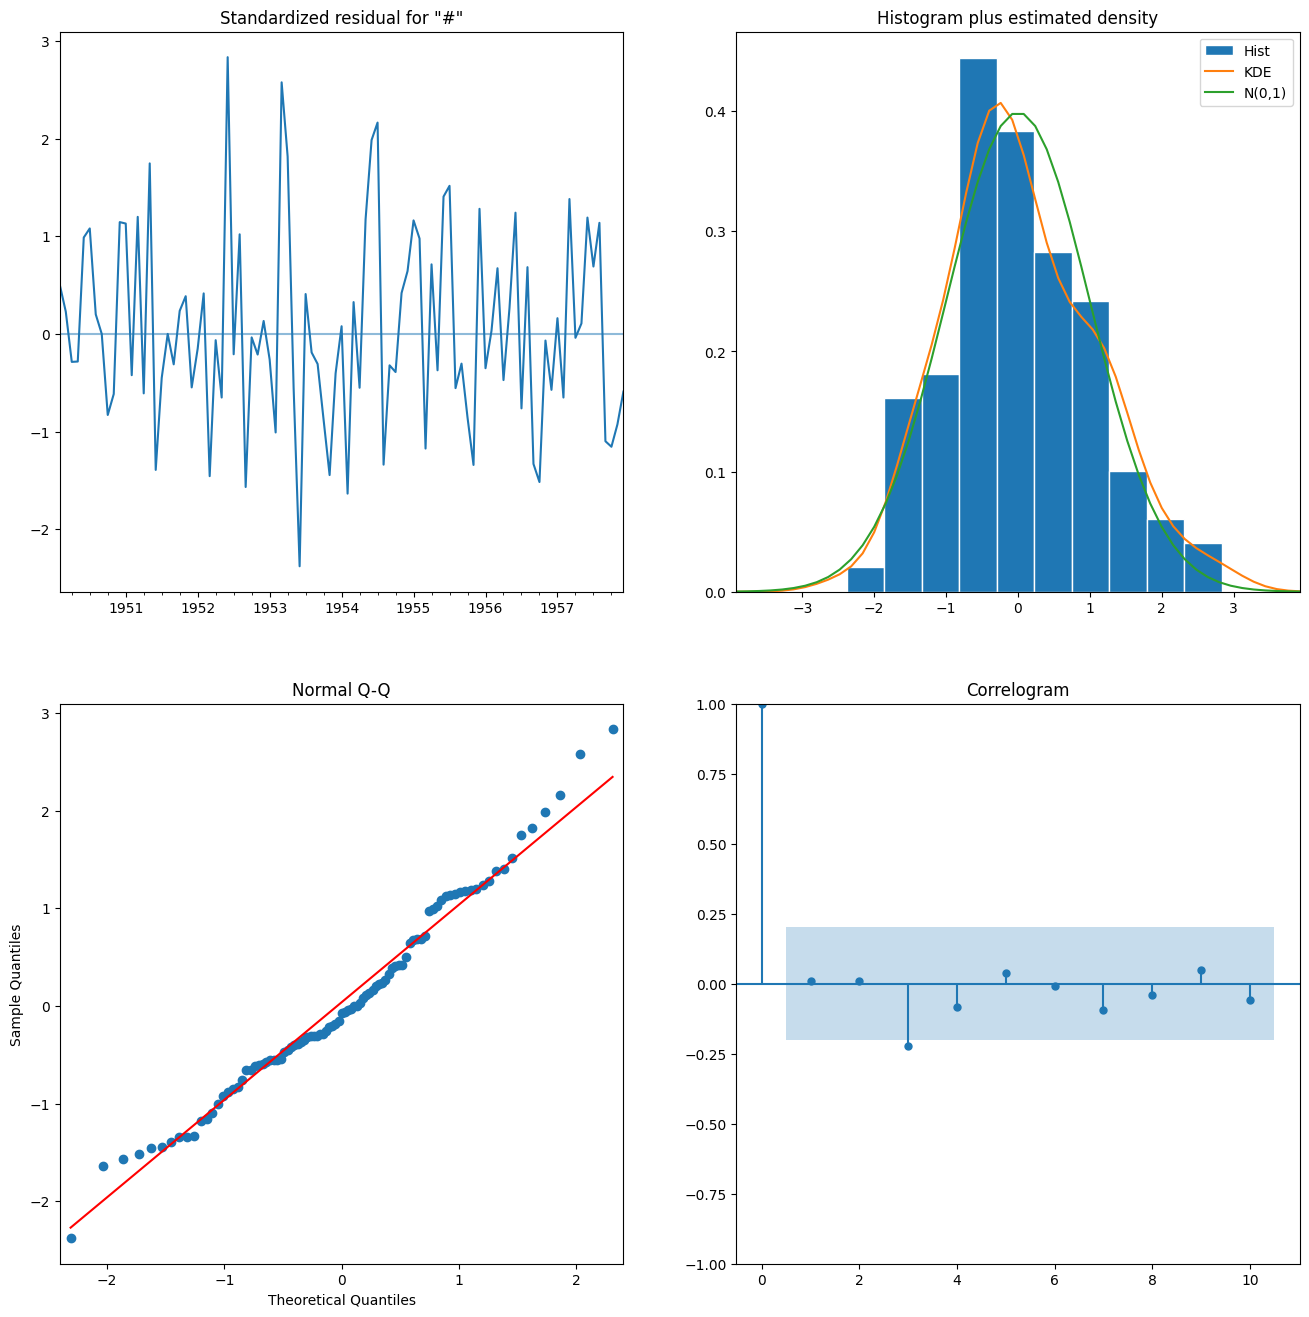

In [16]:
# Ajuste del modelo
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=mejores_parametros[0],
                                seasonal_order=mejores_parametros[1],
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 16))
plt.show()

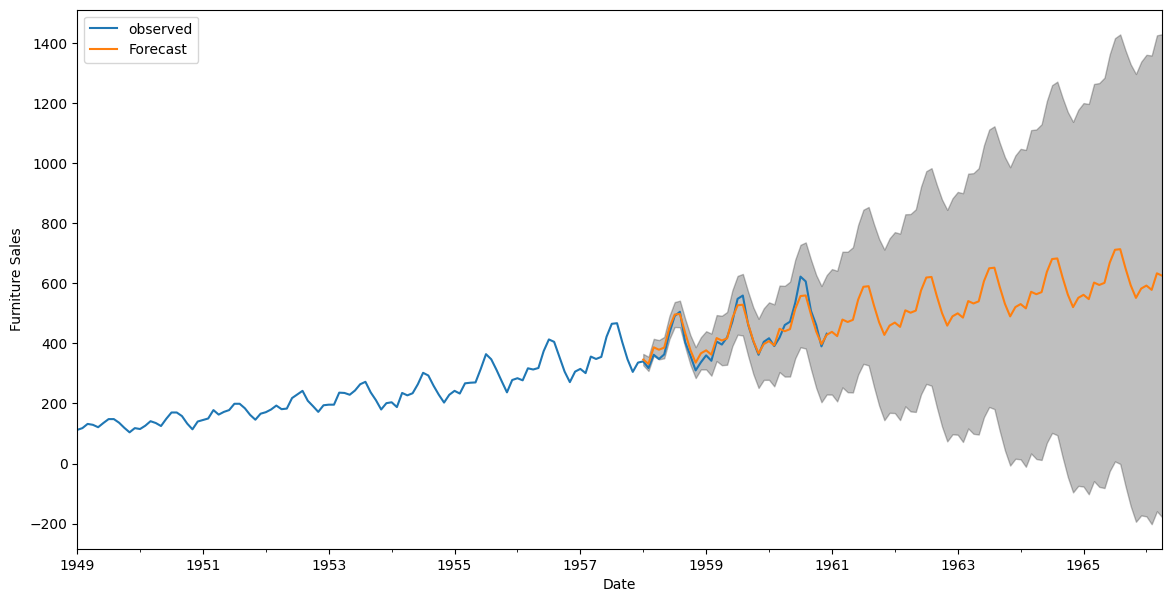

In [17]:
# Predicción a múltiples pasos
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [18]:
# Evaluación de la predicción ARIMA
y_truth = ts['1958-01':]
predicciones_arima = pred_uc.predicted_mean[y_truth.index]

mse = ((predicciones_arima - y_truth) ** 2).mean()
rele = (np.abs(predicciones_arima - y_truth)/y_truth*100).mean()
print('Error cuadrático medio ARIMA {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM ARIMA {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio ARIMA {}'.format(round(rele, 2)))

Error cuadrático medio ARIMA 489.84
Raíz cuadrada de ECM ARIMA 22.13
Error porcentual medio ARIMA 4.15


## Holt-Winters

Error cuadrático medio HW 695.68
Raíz cuadrada de ECM HW 26.38
Error porcentual medio HW 5.11


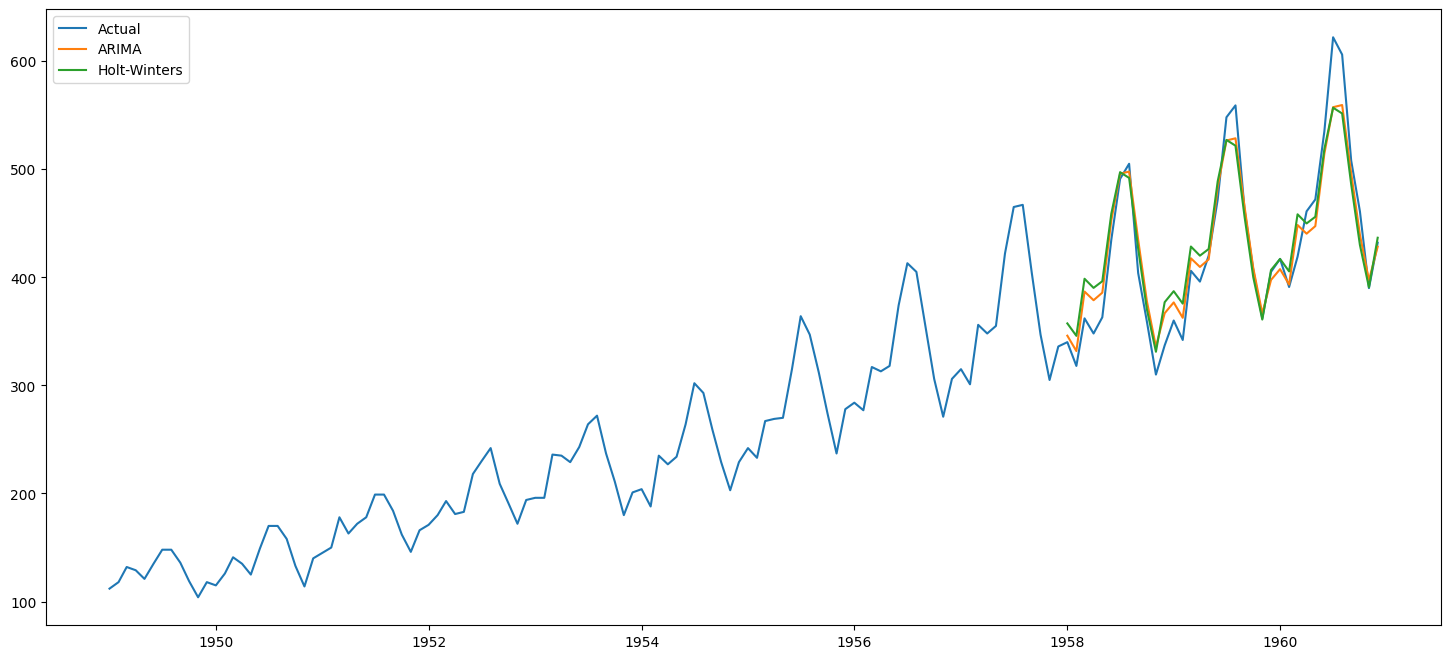

In [24]:
# ------------------------------------
# Holt-Winters
# ------------------------------------
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

from statsmodels.tsa.api import ExponentialSmoothing
hw_model = ExponentialSmoothing(
    y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
predicciones_hw = hw_model.forecast(36)

mse = ((predicciones_hw - y_truth) ** 2).mean()
rele = (np.abs(predicciones_hw - y_truth)/y_truth*100).mean()
print('Error cuadrático medio HW {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM HW {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio HW {}'.format(round(rele, 2)))

plt.plot(data, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.legend()
plt.show()

## Prophet

In [ ]:
# ! pip install prophet

In [40]:
## Prophet
from prophet import Prophet
data_pf = data[:'1957-12'].reset_index().rename(columns={'Month':'ds', '#Passengers':'y'})
m = Prophet()
m.fit(data_pf)


19:23:36 - cmdstanpy - INFO - Chain [1] start processing
19:23:36 - cmdstanpy - INFO - Chain [1] done processing


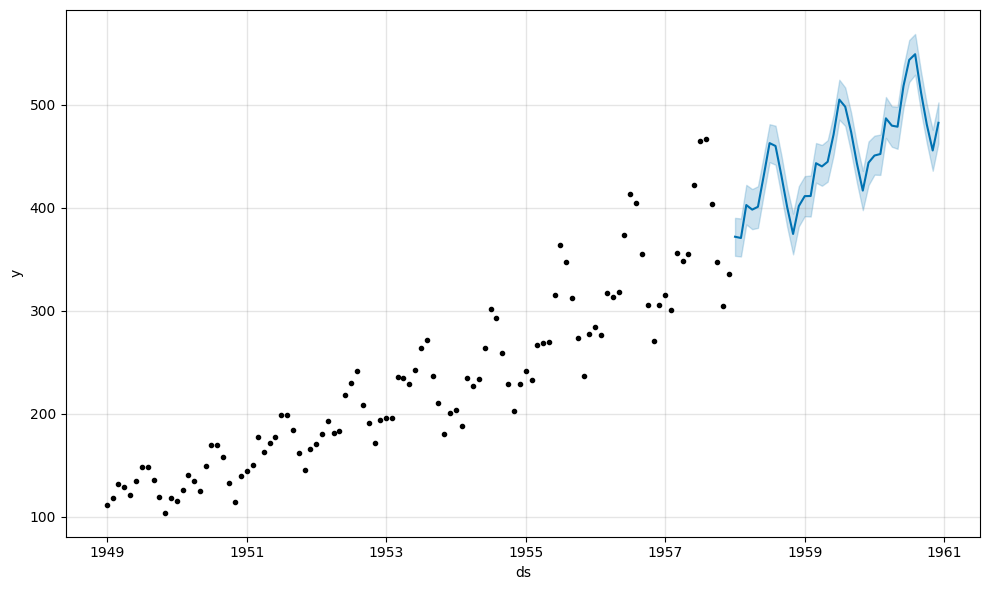

In [72]:
future = m.make_future_dataframe(periods=36, freq='MS')
future = future[future['ds']>'1957-12']
forecast = m.predict(future)
fig1 = m.plot(forecast)

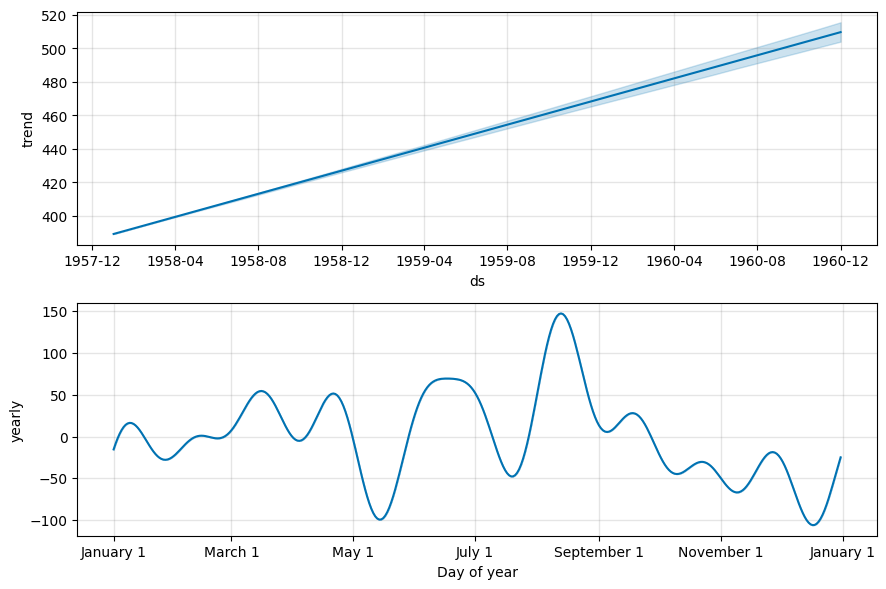

In [73]:
fig2 = fig2 = m.plot_components(forecast)

In [74]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [75]:
plot_components_plotly(m, forecast)

Error cuadrático medio PROPHET 2022.79
Raíz cuadrada de ECM PROPHET 44.98
Error porcentual medio PROPHET 9.88


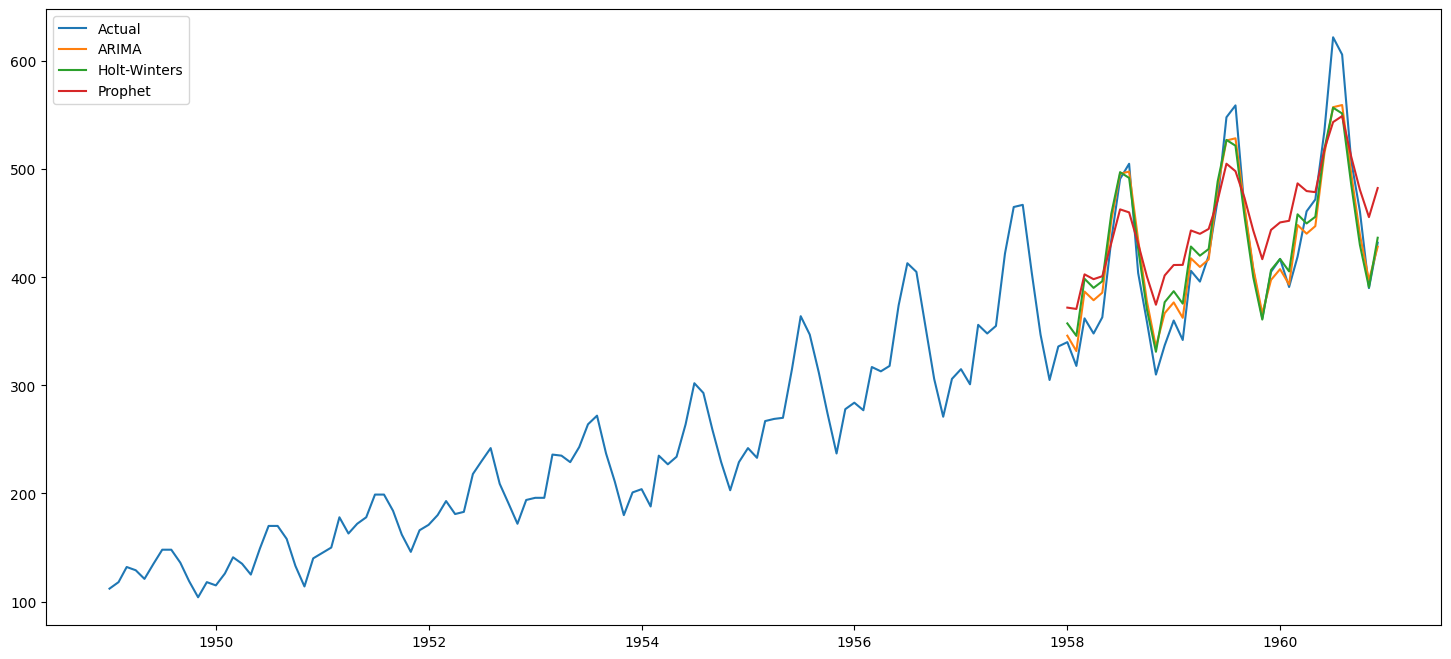

In [78]:
forecast.set_index("ds", inplace=True)
predicciones_prophet = forecast.loc[y_truth.index, "yhat"]
mse = ((predicciones_prophet - y_truth) ** 2).mean()
rele = (np.abs(predicciones_prophet - y_truth)/y_truth*100).mean()
print('Error cuadrático medio PROPHET {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM PROPHET {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio PROPHET {}'.format(round((rele), 2)))

plt.plot(data, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.legend()
plt.show()

## DeepAR